<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/DataAnalysis_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General



"Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations."(https://towardsdatascience.com/exploratory-data-analysis)

EDA enables us ask meaningful questions and gain insights on factors that can impact our business.It also aids by informing conclusions and supporting decision making.

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook seeks to document the process undertaken to analyze fundings received by Indian Start-ups from 2018 to 2021.

# Description

This project aims to draw insights on funding received by Indian startups The aim of project is obtain a descriptive overview and a relationship pattern of funding and growth of newly launched startups.

# Questions

1. Which company received the highest amount of funds?

2. Which company received the lowest amount of funds ?

3. Which Industry received the highest amount of funding?

4. Which industry received the lowest amount of funding?

5. Is there a correlation between company age and funds received?

6. Which location recorded the highest amount of funding received?

7. What is the average age of the start-ups?

8. What is the average amount of funding received?

9. How many companies were funded in each year?

# Hypothesis

Null Hypothesis - The sector of a start-up affect the amount of funding received.

Alternate Hypothesis - The sector of a start up does not affect the amount of funding received

# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [177]:
# pip install pandas
# pip install numpy 
# pip install matplotlib
# pip install seaborn 
# pip install forex_python
# pip install babel 
# pip install seaborn

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [178]:
# Data handling
import pandas as pd
import numpy as np
from statistics import mean
from forex_python.converter import CurrencyRates
from babel.numbers import format_currency
import datetime as dt

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [179]:
df2018 = pd.read_csv("startup_funding2018.csv")
df2019 = pd.read_csv("startup_funding2019.csv")
df2020 = pd.read_csv("startup_funding2020.csv")
df2021 = pd.read_csv("startup_funding2021.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [180]:
# A quick look at the shape of our dataset

df2018.shape

(526, 6)

In [181]:
#Taking a look at the head of our 2018 Data

df2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [182]:
#Taking a look at the tail of our 2018 Data

df2018.tail()

,Company Name,Industry,Round/Series,Amount,Location,About Company
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...
525,Netmeds,"Biotechnology, Health Care, Pharmaceutical",Series C,35000000,"Chennai, Tamil Nadu, India",Welcome to India's most convenient pharmacy!


In [183]:
#Look at the columns in the dataset and their data types

df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [184]:
#replacing — with 0 in Amount column
df2018['Amount'] == '—'
df2018[df2018.columns[3: ]] = df2018[df2018.columns[3: ]].replace('[\—,]' , '0' , regex=True)

In [185]:
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹4000000000,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹6500000000,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...
522,Happyeasygo Group,"Tourism, Travel",Series A,0,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,₹3500000000,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...


In [186]:
#Creating a new currency and date columns
df2018['Currency'] = np.where(df2018.Amount.str.contains('₹'), 'INR', 'USD')
df2018['Currency_Rate_Date'] = dt.datetime(2018,12,31)
df2018.head(350)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31
1,Happy Cow Dairy,"Agriculture, Farming",Seed,₹4000000000,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,₹6500000000,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31
3,PayMe India,"Financial Services, FinTech",Angel,2000000,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31
...,...,...,...,...,...,...,...,...
345,FreightBro,"Apps, B2B, Freight Service, Logistics, SaaS, S...",Seed,0,Mumbai0 Maharashtra0 India,Software for the new-age freight,USD,2018-12-31
346,Finwego,—,Seed,0,Chennai0 Tamil Nadu0 India,Finwego partners with Small and Medium Busines...,USD,2018-12-31
347,Cricnwin,"Digital Entertainment, Fantasy Sports, Gaming,...",Seed,0,Gurgaon0 Haryana0 India,Cricnwin is a Gurugram - based Fan Engagement ...,USD,2018-12-31
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31


In [187]:
#Converting Amount to float
df2018['Amount'] = df2018['Amount'].replace({'\$': '', '\₹': ''}, regex=True).astype(float)
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company Name        526 non-null    object        
 1   Industry            526 non-null    object        
 2   Round/Series        526 non-null    object        
 3   Amount              526 non-null    float64       
 4   Location            526 non-null    object        
 5   About Company       526 non-null    object        
 6   Currency            526 non-null    object        
 7   Currency_Rate_Date  526 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.0+ KB


In [188]:
#Converting Amount to same currency

c = CurrencyRates()
df2018['Amount($)'] = df2018.apply(lambda x: c.convert(x.Currency, 'USD', x.Amount, x.Currency_Rate_Date), axis = 1)
#df_2018['Exchange Rate'] = df_2018['USD']/df_2018['Amount']

exchange_rate = c.get_rate('USD','INR')


df2018.head(50)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.00,Bengaluru0 Karnataka0 India,Hasura is a platform that allows developers to...,USD,2018-12-31,1600000.00
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,1600000000.00,Kalkaji0 Delhi0 India,Tripshelf is an online market place for holida...,INR,2018-12-31,22977606.87
7,Hyperdata.IO,Market Research,Angel,5000000000.00,Hyderabad0 Andhra Pradesh0 India,Hyperdata combines advanced machine learning w...,INR,2018-12-31,71805021.46
8,Freightwalla,"Information Services, Information Technology",Seed,0.00,Mumbai0 Maharashtra0 India,Freightwalla is an international forwarder tha...,USD,2018-12-31,0.00
9,Microchip Payments,Mobile Payments,Seed,0.00,Bangalore0 Karnataka0 India,Microchip payments is a mobile-based payment a...,USD,2018-12-31,0.00


In [189]:
#df2018.drop(['Amount_USD'], axis=1, inplace=True)

df2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00


In [190]:
# A quick look at the shape of our dataset

df2019.shape

(89, 9)

In [191]:
#Taking a look at the head of our 2021 Data

df2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [192]:
#Taking a look at the tail of our 2021 Data

df2019.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.00,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.00,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.00,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [193]:
#Look at the columns in the dataset and their data types

df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [194]:
# A quick look at the shape of our dataset

df2020.shape

(1055, 10)

In [195]:
#Taking a look at the head of our 2021 Data

df2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [196]:
#Taking a look at the tail of our 2021 Data

df2020.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN
1054,Pando,2017,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,"$9,000,000",Series A,NaN


In [197]:
#Look at the columns in the dataset and their data types

df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [198]:
# A quick look at the shape of our dataset

df2021.shape

(1209, 9)

In [199]:
#Taking a look at the head of our 2021 Data

df2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [200]:
#Taking a look at the tail of our 2021 Data

df2021.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B
1208,WeRize,2019.00,Bangalore,Financial Services,India’s first socially distributed full stack ...,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",$8000000,Series A


In [201]:
#Look at the columns in the dataset and their data types

df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


###  Questions

1. Which company received the highest amount of funds?

2. Which company received the lowest amount of funds ?

3. Which Industry received the highest amount of funding?

4. Which industry received the lowest amount of funding?

5. Is there a correlation between company age and funds received?

6. Which location recorded the highest amount of funding received?

7. What is the average age of the start-ups?

8. What is the average amount of funding received?

9. How many companies were funded in each year?

### Hypothesis

Null Hypothesis - The sector of a start-up affect the amount of funding received.

Alternate Hypothesis - The sector of a start up does not affect the amount of funding received

## Issues With The Data

After looking carefully at the data, the following issues were identified

1. The 2018 Dataset had different and fewer columns 
2. The data sets have missing values 
3. Some values are in the wrong columns
4. The datatypes of some of the columns need to be changed
5. One column is unnamed


## How To Handle Issues

1. Analyze the 2018 data separately of the rest 
2. Replace missing data with either N/A or the mode of that column depeding on the column data
3. Move values in the wrong columns to their appropriate columns 
4. Change datatype of columns to appropriate datatypes
5. Rename columns

## Data Preparation 

A careful look at the data shows that df2018 is different from all the other data sets. 
We will combine df2019,df2020 and df2021.

df2018 will cleaned and analyzed separately

In [202]:
#We observe that ithere are dashes in the Amount column. We will replace the dashes(—) with 0
df2018['Amount'] == '—'
df2018[df2018.columns[3: ]] = df2018[df2018.columns[3: ]].replace('[\—,]' , '0' , regex=True)
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...,USD,2018-12-31,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,0.00,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.,USD,2018-12-31,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...,USD,2018-12-31,7500.00
524,Droni Tech,Information Technology,Seed,3500000000.00,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...,INR,2018-12-31,50263515.02


In [203]:
#To differentiate the various currencies in our data set,a new column for currency and date is created 
#df2018['Currency'] = np.where(df2018.Amount.str.contains('₹'), 'INR', 'USD')
#df2018['Currency_Rate_Date'] = dt.datetime(2018,12,31)
#df2018.head(350)

In [204]:
#All currency symbols in our column is removed and the amcount is converted into a float
df2018['Amount'] = df2018['Amount'].replace({'\$': '', '\₹': ''}, regex=True).astype(float)
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company Name        526 non-null    object        
 1   Industry            526 non-null    object        
 2   Round/Series        526 non-null    object        
 3   Amount              526 non-null    float64       
 4   Location            526 non-null    object        
 5   About Company       526 non-null    object        
 6   Currency            526 non-null    object        
 7   Currency_Rate_Date  526 non-null    datetime64[ns]
 8   Amount($)           526 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 37.1+ KB


In [205]:
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00
...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...,USD,2018-12-31,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,0.00,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.,USD,2018-12-31,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...,USD,2018-12-31,7500.00
524,Droni Tech,Information Technology,Seed,3500000000.00,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...,INR,2018-12-31,50263515.02


In [206]:
#Converting Amount to same currency

c = CurrencyRates()
df2018['Amount_USD'] = df2018.apply(lambda x: c.convert(x.Currency, 'USD', x.Amount, x.Currency_Rate_Date), axis = 1)
exchange_rate = c.get_rate('USD','INR')


df2018.head(350)


,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount($),Amount_USD
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
345,FreightBro,"Apps, B2B, Freight Service, Logistics, SaaS, S...",Seed,0.00,Mumbai0 Maharashtra0 India,Software for the new-age freight,USD,2018-12-31,0.00,0.00
346,Finwego,—,Seed,0.00,Chennai0 Tamil Nadu0 India,Finwego partners with Small and Medium Busines...,USD,2018-12-31,0.00,0.00
347,Cricnwin,"Digital Entertainment, Fantasy Sports, Gaming,...",Seed,0.00,Gurgaon0 Haryana0 India,Cricnwin is a Gurugram - based Fan Engagement ...,USD,2018-12-31,0.00,0.00
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00,250000.00


In [207]:
#Changing how floats look like in our data. We change to 2 decimal places 
pd.options.display.float_format = '{:.2f}'.format

In [208]:
df2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Currency,Currency_Rate_Date,Amount($),Amount_USD
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,USD,2018-12-31,250000.00,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,4000000000.00,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,INR,2018-12-31,57444017.17,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,6500000000.00,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,INR,2018-12-31,93346527.90,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,2000000.00,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,USD,2018-12-31,2000000.00,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,USD,2018-12-31,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.00,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...,USD,2018-12-31,225000000.00,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,0.00,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.,USD,2018-12-31,0.00,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.00,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...,USD,2018-12-31,7500.00,7500.00
524,Droni Tech,Information Technology,Seed,3500000000.00,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...,INR,2018-12-31,50263515.02,50263515.02


In [308]:
# dropping the Currency, Currency_Rate_Date and Amount_USD columns

#df2018.drop(['Amount'], axis=1, inplace=True)
df2018.drop(['Currency'], axis=1, inplace=True)
df2018.drop(['Currency_Rate_Date'], axis=1, inplace=True)
df2018.drop(['Amount_USD'], axis=1, inplace=True)
df2018

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,0.00
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...,7500.00
524,Droni Tech,Information Technology,Seed,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...,50263515.02


In [309]:
# Renaming 2018 columns

df2018.rename(columns = {'Company Name':'Company/Brand'}, inplace = True)
df2018.rename(columns = {'Industry':'Sector'}, inplace = True)
df2018.rename(columns = {'Round/Series':'Stage'}, inplace = True)
df2018.rename(columns = {'Location':'HeadQuarter'}, inplace = True)
df2018.rename(columns = {'About Company':'What it does'}, inplace = True)
df2018.rename(columns = {'About Company':'What it does'}, inplace = True)

In [310]:
df2018

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangalore0 Karnataka0 India,TheCollegeFever is a hub for fun0 fiesta and f...,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbai0 Maharashtra0 India,A startup which aggregates milk from dairy far...,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaon0 Haryana0 India,Leading Online Loans Marketplace in India,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,Noida0 Uttar Pradesh0 India,PayMe India is an innovative FinTech organizat...,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabad0 Andhra Pradesh0 India,Eunimart is a one stop solution for merchants ...,0.00
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,Bangalore0 Karnataka0 India,Udaan is a B2B trade platform0 designed specif...,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,Haryana0 Haryana0 India,HappyEasyGo is an online travel domain.,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,Mumbai0 Maharashtra0 India,Mombay is a unique opportunity for housewives ...,7500.00
524,Droni Tech,Information Technology,Seed,Mumbai0 Maharashtra0 India,Droni Tech manufacture UAVs and develop softwa...,50263515.02


#### Cleaning the individual coulmns
#### Company/Brand

In [212]:
df2018['Company/Brand'].unique()

array(['TheCollegeFever', 'Happy Cow Dairy', 'MyLoanCare', 'PayMe India',
       'Eunimart', 'Hasura', 'Tripshelf', 'Hyperdata.IO', 'Freightwalla',
       'Microchip Payments', 'BizCrum Infotech Pvt. Ltd.', 'Emojifi',
       'Flock', 'Freshboxx', 'Wide Mobility Mechatronics', 'Pitstop',
       'Mihuru', 'Fyle', 'AppWharf', 'Antariksh Waste Ventures Pvt ltd',
       'Cogoport', 'PaisaDukan', 'Sleepy Owl Coffee', 'BlueJack',
       'PregBuddy', 'AgNext Technologies', 'Pando', 'Mintifi', 'Carcrew',
       'NicheAI', 'Chariot Tech',
       'Ideal Insurance Brokers/ 121Policy.com', 'Loanzen',
       'Mojro Technologies', 'Elemential', 'Loadshare', 'Yumlane',
       'Kriger Campus', 'Pipa+Bella', 'Kaleidofin', 'Chakr Innovation',
       'IndigoLearn', 'UClean', 'Coutloot', 'Letstrack', 'Pooltoo',
       'Finzy', 'Fitternity', 'Keito', 'Tolet for Students', 'Chai Kings',
       'Dainik Jagran', 'Playtoome', 'ONGO Framework', 'Notesgen',
       'Arogya MedTech', 'Propshop24', 'myUpchar',
     

#### Sector

In [213]:
df2018['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

#### Stage

In [214]:
df2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [312]:
df2018['Stage'] = df2018['Stage'].replace(['https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'], ['Undisclosed'])

df2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

#### HeadQuarter

In [314]:
df2018['HeadQuarter'].unique()



array(['Bangalore0 Karnataka0 India', 'Mumbai0 Maharashtra0 India',
       'Gurgaon0 Haryana0 India', 'Noida0 Uttar Pradesh0 India',
       'Hyderabad0 Andhra Pradesh0 India', 'Bengaluru0 Karnataka0 India',
       'Kalkaji0 Delhi0 India', 'Delhi0 Delhi0 India', 'India0 Asia',
       'Hubli0 Karnataka0 India', 'New Delhi0 Delhi0 India',
       'Chennai0 Tamil Nadu0 India', 'Mohali0 Punjab0 India',
       'Kolkata0 West Bengal0 India', 'Pune0 Maharashtra0 India',
       'Jodhpur0 Rajasthan0 India', 'Kanpur0 Uttar Pradesh0 India',
       'Ahmedabad0 Gujarat0 India', 'Azadpur0 Delhi0 India',
       'Haryana0 Haryana0 India', 'Cochin0 Kerala0 India',
       'Faridabad0 Haryana0 India', 'Jaipur0 Rajasthan0 India',
       'Kota0 Rajasthan0 India', 'Anand0 Gujarat0 India',
       'Bangalore City0 Karnataka0 India', 'Belgaum0 Karnataka0 India',
       'Thane0 Maharashtra0 India', 'Margão0 Goa0 India',
       'Indore0 Madhya Pradesh0 India', 'Alwar0 Rajasthan0 India',
       'Kannur0 Kerala0 Ind

In [316]:
#Replacing all 0 with o in HQ.
df2018[df2018.columns[3: ]] = df2018[df2018.columns[3: ]].replace('0' , 'o' , regex=True)

df2018

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangaloreo Karnatakao India,TheCollegeFever is a hub for funo fiesta and f...,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbaio Maharashtrao India,A startup which aggregates milk from dairy far...,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaono Haryanao India,Leading Online Loans Marketplace in India,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,Noidao Uttar Pradesho India,PayMe India is an innovative FinTech organizat...,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabado Andhra Pradesho India,Eunimart is a one stop solution for merchants ...,0.00
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,Bangaloreo Karnatakao India,Udaan is a B2B trade platformo designed specif...,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,Haryanao Haryanao India,HappyEasyGo is an online travel domain.,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,Mumbaio Maharashtrao India,Mombay is a unique opportunity for housewives ...,7500.00
524,Droni Tech,Information Technology,Seed,Mumbaio Maharashtrao India,Droni Tech manufacture UAVs and develop softwa...,50263515.02


#### What it does

In [317]:
df2018['What it does'].unique()

array(['TheCollegeFever is a hub for funo fiesta and frolic of Colleges.',
       'A startup which aggregates milk from dairy farmers in rural Maharashtra.',
       'Leading Online Loans Marketplace in India',
       'PayMe India is an innovative FinTech organization which offers short term financial suport to corporate employees.',
       'Eunimart is a one stop solution for merchants to create a difference by selling globally.',
       'Hasura is a platform that allows developers to buildo deployo and host cloud-native applications quickly.',
       'Tripshelf is an online market place for holiday packages.',
       'Hyperdata combines advanced machine learning with human intelligence.',
       'Freightwalla is an international forwarder thats helps you manage supply chain by providing online tools including instant quotations.',
       'Microchip payments is a mobile-based payment application and point-of-sale device',
       'Building Transactionary B2B Marketplaces',
       'Emoji

#### Amount($)

In [318]:
df2018['Amount($)'].unique()

array([2.50000000e+05, 5.74440172e+07, 9.33465279e+07, 2.00000000e+06,
       0.00000000e+00, 1.60000000e+06, 2.29776069e+07, 7.18050215e+07,
       1.43610043e+08, 1.50000000e+05, 1.10000000e+06, 7.18050215e+04,
       6.00000000e+06, 6.50000000e+05, 5.02635150e+07, 9.19104275e+07,
       2.87220086e+07, 1.00000000e+06, 5.00000000e+06, 4.00000000e+06,
       4.30830129e+07, 2.80000000e+06, 1.70000000e+06, 1.30000000e+06,
       7.18050215e+06, 1.73050102e+07, 2.15415064e+07, 5.00000000e+05,
       1.49354445e+08, 6.46245193e+07, 1.34000000e+07, 3.59025107e+07,
       3.73960552e+07, 1.14888034e+07, 8.61660258e+03, 9.00000000e+06,
       1.00000000e+05, 2.00000000e+04, 1.20000000e+05, 4.88274146e+07,
       4.91146347e+08, 1.43014500e+06, 8.61660258e+08, 7.42000000e+10,
       1.43610043e+10, 2.87220086e+10, 3.09800000e+08, 1.43610043e+04,
       3.59025107e+08, 1.00000000e+12, 7.00000000e+08, 3.50000000e+09,
       7.89855236e+08, 2.80500000e+09, 2.00000000e+08, 3.44664103e+08,
      

In [340]:
#df2018['Amount($)']=df2018['Amount($)'].astype(int)
#df2018["Amount($)"] = df2018["Amount($)"].map('{:,d}'.format)
#df2018["Amount($)"] = df2018["Amount($)"].map('{:.0f}'.format)
df2018

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangaloreo Karnatakao India,TheCollegeFever is a hub for funo fiesta and f...,250000.00
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbaio Maharashtrao India,A startup which aggregates milk from dairy far...,57444017.17
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaono Haryanao India,Leading Online Loans Marketplace in India,93346527.90
3,PayMe India,"Financial Services, FinTech",Angel,Noidao Uttar Pradesho India,PayMe India is an innovative FinTech organizat...,2000000.00
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabado Andhra Pradesho India,Eunimart is a one stop solution for merchants ...,0.00
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,Bangaloreo Karnatakao India,Udaan is a B2B trade platformo designed specif...,225000000.00
522,Happyeasygo Group,"Tourism, Travel",Series A,Haryanao Haryanao India,HappyEasyGo is an online travel domain.,0.00
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,Mumbaio Maharashtrao India,Mombay is a unique opportunity for housewives ...,7500.00
524,Droni Tech,Information Technology,Seed,Mumbaio Maharashtrao India,Droni Tech manufacture UAVs and develop softwa...,50263515.02


#### Cleaning df2019, df2020 and df2021

In [320]:
df2019['Amount($)'] = df2019['Amount($)'].replace({'\$':''}, regex = True)
df2019
df2020['Amount($)'] = df2020['Amount($)'].replace({'\$':''}, regex = True)
df2020
df2021['Amount($)'] = df2021['Amount($)'].replace({'\$':''}, regex = True)
df2021


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","120,000,000",NaN
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.00,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015.00,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019.00,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015.00,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [334]:
#Combing all 4 data sets into a single data frame (DF)

frames = [df2018,df2019, df2020, df2021]
  
df= pd.concat(frames)

In [338]:
df.tail(170)

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor,Unnamed: 9
1039,Gramophone,AgriTech,NaN,Indore,Create a difference in farming by bringing tim...,10000000,2016.00,"Tauseef Khan, Harshit Gupta",Z3Partners,NaN
1040,Healofy,Femtech,Series B,Bangalore,Healofy was created with a mission to experien...,6000000,2016.00,"Gaurav Aggarwal, Shubham Maheshwari","Celesta Capital, Omidyar Network India",NaN
1041,E42,Computer Software,Series A,Pune,E42 is the world’s leading Natural Language Pr...,5400000,2012.00,"Animesh Samuel, Sanjeev Menon",Pavestone Ventures,NaN
1042,Spottabl,Human Resources,Seed,Bangalore,Spottabl is a technology driven recruitment pl...,400000,2017.00,"Vanishri Deshpande, Satheesh K V, Anupam Choud...","LetsVenture, Paradigm Shift VC, Binny Bansal",NaN
1043,DeHaat,Information Technology & Services,Series D,Gurugram,DeHaat™ is one of the fastest growing start-up...,115000000,2012.00,"Amrendra Singh, Shyam Sundar, Adarsh Srivastav...","Sofina, Lightrock India, Temasek",NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000,2019.00,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN
1205,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000,2015.00,Bala Sarda,IIFL AMC,NaN
1206,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000,2019.00,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN
1207,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000,2015.00,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN


In [342]:
#df.Founded = df.Founded.apply(int)

#### Lets take a look at the unique values in each of the columns to get a general overview of what the table contains

In [218]:
df['Company/Brand'].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', ...,
       'Cogos Technologies', 'Vahdam', 'WeRize'], dtype=object)

In [219]:
df['Founded'].unique()

array([nan, 2014.0, 2004.0, 2013.0, 2010.0, 2018.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020',
       '2016', '2008', '2015', '2017', '2014', '1998', '2007', '2011',
       '1982', '2013', '2009', '2012', '1995', '2010', '2006', '1978',
       '1999', '1994', '2005', '1973', '-', '2002', '2004', '2001',
       2021.0, 2020.0, 1993.0, 1999.0, 1989.0, 2009.0, 2002.0, 1994.0,
       2006.0, 2000.0, 2007.0, 1978.0, 2003.0, 1998.0, 1991.0, 1984.0,
       2005.0, 1963.0], dtype=object)

In [220]:
df['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan', 'Indore', 'Gurgaon', 'Belgaum', 'Andheri', 'Kolkata',
       'Tirunelveli, Tamilnadu', 'Thane', 'Singapore', 'Gujarat',
       'Kerala', 'Jodhpur', 'Jaipur, Rajastan',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, W

In [221]:
df['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking', 'EdTech',
       'Hygiene management', 'Escrow', 'Networking platform', 'FinTech',
       'Crowdsourcing', 'Food & Bevarages', 'HealthTec

In [222]:
df['What it does'].unique()

array(['Provides a range of male grooming products',
       'A learning platform that provides topic-based journey, animated videos, quizzes, infographic and mock tests to students',
       'It aims to make learning fun via games.', ...,
       'International education loans for high potential students.',
       'Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals.',
       'India’s first socially distributed full stack financial services platform for small town India'],
      dtype=object)

# Feature Processing
Here is the section to **clean** and **process** the features of the dataset.

### Missing/NaN Values
Each column is cleaned individually by first looking at the total number of empty rows and then extracting thoses rows and handle the missing/NaN values.

### Founded Column

In [343]:
# Total Number of empty rows in the Founded Column 
df['Founded'].isnull().sum()

768

In [344]:
# Extracting the row with  missing data in the Founded column
df[df['Founded'].isna()]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangaloreo Karnatakao India,TheCollegeFever is a hub for funo fiesta and f...,250000.00,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbaio Maharashtrao India,A startup which aggregates milk from dairy far...,57444017.17,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaono Haryanao India,Leading Online Loans Marketplace in India,93346527.90,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,Noidao Uttar Pradesho India,PayMe India is an innovative FinTech organizat...,2000000.00,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabado Andhra Pradesho India,Eunimart is a one stop solution for merchants ...,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1043,Quicko,Taxation,NaN,Ahmedabad,Online tax planning and filing platform,"280,000",NaN,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter",NaN
1044,Satin Creditcare,Fintech,NaN,Gurgaon,A micro finance company,"15,000,000",NaN,NaN,Austrian Bank,NaN
1050,Leverage Edu,Edtech,NaN,Delhi,AI enabled marketplace that provides career gu...,"1,500,000",NaN,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",NaN
1051,EpiFi,Fintech,Seed Round,NaN,It offers customers with a single interface fo...,"13,200,000",NaN,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",NaN


In [345]:
# fill NaN rows with 0

df['Founded'] = df['Founded'].replace(np.nan, 0)

In [346]:
# filling rows with - with 0

df['Founded'] = df['Founded'].replace('-',0)

In [347]:
#Change the datatype of Founded column from Float to int first to remove the decimal

df['Founded'] = df['Founded'].astype(int)

In [348]:
#Replace the missing data in Founders column with 'N/A'

df['Founded'] = df['Founded'].replace(0, 'N/A')

In [349]:
#Change the datatype of Founded column from Float to string 

df['Founded'] = df['Founded'].astype(str)

In [350]:
df

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangaloreo Karnatakao India,TheCollegeFever is a hub for funo fiesta and f...,250000.00,N/A,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbaio Maharashtrao India,A startup which aggregates milk from dairy far...,57444017.17,N/A,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaono Haryanao India,Leading Online Loans Marketplace in India,93346527.90,N/A,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,Noidao Uttar Pradesho India,PayMe India is an innovative FinTech organizat...,2000000.00,N/A,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabado Andhra Pradesho India,Eunimart is a one stop solution for merchants ...,0.00,N/A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN
1205,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000,2015,Bala Sarda,IIFL AMC,NaN
1206,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN
1207,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000,2015,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN


#### Data types of HeadQuater, Sector, What it does, Founders, Investor and Stage are the same.  So we replace all missing data in those columns with 'N/A'

In [351]:
#updating the columns 

df.update(df[['HeadQuarter','Sector','What it does', 'Founders', 'Investor','Stage']].fillna('N/A'))

In [352]:
df

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangaloreo Karnatakao India,TheCollegeFever is a hub for funo fiesta and f...,250000.00,N/A,N/A,N/A,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbaio Maharashtrao India,A startup which aggregates milk from dairy far...,57444017.17,N/A,N/A,N/A,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaono Haryanao India,Leading Online Loans Marketplace in India,93346527.90,N/A,N/A,N/A,NaN
3,PayMe India,"Financial Services, FinTech",Angel,Noidao Uttar Pradesho India,PayMe India is an innovative FinTech organizat...,2000000.00,N/A,N/A,N/A,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabado Andhra Pradesho India,Eunimart is a one stop solution for merchants ...,0.00,N/A,N/A,N/A,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN
1205,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000,2015,Bala Sarda,IIFL AMC,NaN
1206,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN
1207,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000,2015,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN


### Unnamed Column

In [353]:
# A look at Unnamed: 9 column 

df['Unnamed: 9'].unique()

array([nan, 'Pre-Seed', 'Seed Round'], dtype=object)

In [354]:
# A careful look at the Stage column and the unnamed column shows that data from the stage column, moved to the unanmed column

In [355]:
#Extracting rows with values ie negative na (- na) in the unnamed column. This will enable us deduce which rows have value in the unnamed column
df[-df['Unnamed: 9'].isna()]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor,Unnamed: 9
611,Walrus,Fintech,Pre-Seed,Bangalore,It provides banking solutions for teens and yo...,Undisclosed,2019,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,Pre-Seed
613,goDutch,Fintech,Seed Round,Mumbai,Group Payments platform,"1,700,000",N/A,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",Seed Round


In [356]:
# Since the column is just a repetition of the Stage column, the unnamed column is droped. 
df.drop('Unnamed: 9', inplace=True, axis=1)

### Stage Column

In [237]:
df['Stage'].unique()

array(['N/A', 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', 'Pre-seed', 'Seed', 'Pre-series',
       'Debt', 'Pre-series C', 'Pre-series B', 'Bridge', 'Series B2',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       '$1200000', 'Seed+', 'Series F2', 'Series A+', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I'], dtype=object)

In [357]:
# Stage column also contains amounts. Lets extract the rows with figures in them using the $ sign as our condition . 
df[df['Stage'].str.contains('\$')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
98,FanPlay,Computer Games,$1200000,Computer Games,A real money game app specializing in trivia g...,Upsparks,2020,YC W21,"Pritesh Kumar, Bharat Gupta"
111,FanPlay,Computer Games,$1200000,Computer Games,A real money game app specializing in trivia g...,Upsparks,2020,YC W21,"Pritesh Kumar, Bharat Gupta"
538,Little Leap,EdTech,$300000,New Delhi,Soft Skills that make Smart Leaders,ah! Ventures,2020,Holistic Development Programs for children in ...,Vishal Gupta
551,BHyve,Human Resources,$300000,Mumbai,A Future of Work Platform for diffusing Employ...,"ITO Angel Network, LetsVenture",2020,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale"
674,MYRE Capital,Commercial Real Estate,$6000000,Mumbai,Democratising Real Estate Ownership,NaN,2020,Own rent yielding commercial properties,Aryaman Vir
677,Saarthi Pedagogy,EdTech,$1000000,Ahmadabad,"India's fastest growing Pedagogy company, serv...","JITO Angel Network, LetsVenture",2015,Pedagogy,Sushil Agarwal


In [358]:
#Remove all amount values with $ sign in the Stage column and put them in the Amount ($) colum

new = df['Stage'].str.contains('\$')
df.loc[new, ['Stage', 'Amount($)']] = df.loc[new, ['Amount($)', 'Stage']].to_numpy()

In [359]:
#Lets check the column again and make sure the stage column does not have any values with $ sign.

df[df['Stage'].str.contains('\$',na=False)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor


In [241]:
# Lets inspect the stage column by looking at the unique values 
df['Stage'].unique()

array(['N/A', 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', 'Pre-seed', 'Seed', 'Pre-series',
       'Debt', 'Pre-series C', 'Pre-series B', 'Bridge', 'Series B2',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       'Upsparks', 'Seed+', 'Series F2', 'Series A+', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'ah! Ventures',
       'ITO Angel Network, LetsVenture', 'Early seed', nan,
       'JITO Angel Network, LetsVenture', 'Seies A', 'Serie

In [360]:
# Extract columns with foreign values
df[df['Stage'].str.contains('venture|network|upsparks',case=False, na=False)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
94,Rays Power Infra,"Energy, Solar",Venture - Series Unknown,Jaipuro Rajasthano India,Rays Power Infra is a leading integrated Solar...,28722008583.99,N/A,N/A,N/A
106,Vivriti Capital,Financial Services,Venture - Series Unknown,Chennaio Tamil Naduo India,Vivriti Capital is an online platform for inst...,2805000000.00,N/A,N/A,N/A
118,SEDEMAC Mechatronics,"Automotive, Electric Vehicle, Renewable Energy",Venture - Series Unknown,Mumbaio Maharashtrao India,SEDEMAC Mechatronics is technology company tha...,0.00,N/A,N/A,N/A
119,MadGuy Labs,E-Learning,Venture - Series Unknown,Hyderabado Andhra Pradesho India,MadGuy Labs is a Online Test-prep Platform.,1500000.00,N/A,N/A,N/A
131,Wakefit,"Manufacturing, Retail",Venture - Series Unknown,Bangaloreo Karnatakao India,Wakefitkart is a mattress manufacturing compan...,933465278.98,N/A,N/A,N/A
132,Hero Electric,Manufacturing,Venture - Series Unknown,New Delhio Delhio India,Hero Electrico a 1oo% subsidiary of the Hero G...,15222664549.52,N/A,N/A,N/A
138,Wow Venue,Events,Venture - Series Unknown,Mumbaio Maharashtrao India,Wow Venue is an online platform.,105000000.00,N/A,N/A,N/A
143,MyNewCar.in,"Automotive, E-Commerce",Venture - Series Unknown,Gurgaono Haryanao India,MyNewCar.in offers new cars at best price with...,100000000.00,N/A,N/A,N/A
152,Shopkirana,"E-Commerce, Mobile, Retail",Venture - Series Unknown,Indoreo Madhya Pradesho India,Shopkirana connects brands and traditional ret...,200000000.00,N/A,N/A,N/A
153,Fric Bergen,—,Venture - Series Unknown,Alwaro Rajasthano India,Fric Bergen is a leader in the specialty food ...,0.00,N/A,N/A,N/A


In [361]:
#replace foreign values with N/A
df.loc[df['Stage'].str.contains('venture|network|upsparks|PE', case=False, na=False), 'Stage'] = 'N/A'  

In [362]:
df['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'N/A', 'Grant', 'Debt Financing',
       'Post-IPO Debt', 'Series H', 'Series C', 'Series E',
       'Corporate Round', 'Undisclosed', 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Series D1', 'Mid series',
       'Series C, D', 'Seed+', 'Series F2', 'Series A

In [363]:
#replace misspelled stage names with the appropriate stage names 
df['Stage'] = df['Stage'].replace({'Seed+':'Seed','Seed Round & Series A':'Series A','Seies A':'Series A','Series A-1':'Series A',
                                  'Series C,D':'Series C','Seed funding':'Seed','Seed fund':'Seed','Seed round':'Seed'}, regex=True)

### HeadQuater

In [364]:
df['HeadQuarter'].unique()

array(['Bangaloreo Karnatakao India', 'Mumbaio Maharashtrao India',
       'Gurgaono Haryanao India', 'Noidao Uttar Pradesho India',
       'Hyderabado Andhra Pradesho India', 'Bengaluruo Karnatakao India',
       'Kalkajio Delhio India', 'Delhio Delhio India', 'Indiao Asia',
       'Hublio Karnatakao India', 'New Delhio Delhio India',
       'Chennaio Tamil Naduo India', 'Mohalio Punjabo India',
       'Kolkatao West Bengalo India', 'Puneo Maharashtrao India',
       'Jodhpuro Rajasthano India', 'Kanpuro Uttar Pradesho India',
       'Ahmedabado Gujarato India', 'Azadpuro Delhio India',
       'Haryanao Haryanao India', 'Cochino Keralao India',
       'Faridabado Haryanao India', 'Jaipuro Rajasthano India',
       'Kotao Rajasthano India', 'Anando Gujarato India',
       'Bangalore Cityo Karnatakao India', 'Belgaumo Karnatakao India',
       'Thaneo Maharashtrao India', 'Margãoo Goao India',
       'Indoreo Madhya Pradesho India', 'Alwaro Rajasthano India',
       'Kannuro Keralao Ind

In [365]:
#remove t#REF!from names in headquarters

df['HeadQuarter'] = df['HeadQuarter'].replace({'\t#REF!': ''}, regex=True)

In [366]:
# from our unique function, we see that food and beverages, pharmaceuticals and Information Technology & Services
# are in our headquarter column. Lets extract them 

df[df['HeadQuarter'].str.contains('Information Technology & Services|Online Media|Pharmaceuticals|Computer Games',case=False, na=False)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
98,FanPlay,Computer Games,N/A,Computer Games,A real money game app specializing in trivia g...,$1200000,2020,YC W21,"Pritesh Kumar, Bharat Gupta"
111,FanPlay,Computer Games,N/A,Computer Games,A real money game app specializing in trivia g...,$1200000,2020,YC W21,"Pritesh Kumar, Bharat Gupta"
242,Fullife Healthcare,Primary Business is Development and Manufactur...,N/A,Pharmaceuticals,Varun Khanna,Series C,2009,Morgan Stanley Private Equity Asia,$22000000
256,Fullife Healthcare,Primary Business is Development and Manufactur...,N/A,Pharmaceuticals,Varun Khanna,Series C,2009,Morgan Stanley Private Equity Asia,$22000000
1100,Sochcast,Sochcast is an Audio experiences company that ...,N/A,Online Media,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",NaN,2020,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed
1176,Peak,"Manchester, Greater Manchester",Series C,Information Technology & Services,Peak helps the world's smartest companies put ...,75000000,2014,Atul Sharma,SoftBank Vision Fund 2


In [367]:
#moving values from the wrong columns to their appropriate  column

h= df['HeadQuarter'].str.contains('Pharmaceuticals')
df.loc[h, ['HeadQuarter', 'Sector','What it does']] = df.loc[h, ['What it does', 'HeadQuarter','Sector']].to_numpy()

In [368]:
df[df['HeadQuarter'].str.contains('Online Media')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
1100,Sochcast,Sochcast is an Audio experiences company that ...,N/A,Online Media,"CA Harvinderjit Singh Bhatia, Garima Surana, A...",NaN,2020,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed


In [369]:
#moving values from the wrong columns to their appropriate  column

s=df['HeadQuarter'].str.contains('Online Media')
df.loc[s, ['Sector', 'What it does']] = df.loc[s, ['HeadQuarter','Sector']].to_numpy()

In [370]:
#moving values from the wrong columns to their appropriate  column

t= df['HeadQuarter'].str.contains('Information Technology & Services')
df.loc[t,['HeadQuarter','Sector']] = df.loc[t, ['Sector','HeadQuarter']].to_numpy()

In [371]:
df[df['HeadQuarter'].str.contains('Online Media')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
1100,Sochcast,Online Media,N/A,Online Media,Sochcast is an Audio experiences company that ...,NaN,2020,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed


In [372]:
# SInce the HeadQuater of Sochcast cant be determined, we replace it with N/A

df['HeadQuarter']= df['HeadQuarter'].replace({'Online Media':'N/A','Computer Games':'N/A'}, regex = True)

### Sector Column

In [373]:
df['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [374]:
#Extarct wrong sector value 
df[df['Sector'].str.contains('MoEVing is')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
257,MoEVing,MoEVing is India's only Electric Mobility focu...,N/A,Gurugram,"Vikash Mishra, Mragank Jain",Seed,2021,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000


In [375]:
# Lets put the column values in their right position 
m = df['Sector'].str.contains('MoEVing is')
df.loc[m, ['What it does']]= df.loc[m, ['Sector']].to_numpy()

In [376]:
df['Sector']= df['Sector'].replace({'MoEVing is India\'s only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.':'N/A'}, regex = True)

### Investor Column 

In [377]:
df['Investor'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2879 entries, 0 to 1208
Series name: Investor
Non-Null Count  Dtype 
--------------  ----- 
2879 non-null   object
dtypes: object(1)
memory usage: 45.0+ KB


In [378]:
df[df['Investor'].str.contains('\$')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
242,Fullife Healthcare,Pharmaceuticals,N/A,Varun Khanna,Primary Business is Development and Manufactur...,Series C,2009,Morgan Stanley Private Equity Asia,$22000000
256,Fullife Healthcare,Pharmaceuticals,N/A,Varun Khanna,Primary Business is Development and Manufactur...,Series C,2009,Morgan Stanley Private Equity Asia,$22000000
257,MoEVing,N/A,N/A,Gurugram,MoEVing is India's only Electric Mobility focu...,Seed,2021,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000
545,AdmitKard,EdTech,N/A,Noida,A tech solution for end to end career advisory...,Pre-series A,2016,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000
1100,Sochcast,Online Media,N/A,N/A,Sochcast is an Audio experiences company that ...,NaN,2020,"Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed


In [379]:
#moving all the Amounts in the wrong column (Investor) to the appropriate column (Amount($))

i=df['Investor'].str.contains('\$')
df.loc[i, ['Amount($)']]= df.loc[i, ['Investor']].to_numpy()

In [380]:
df[df['Investor'].str.contains('REF')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
1148,Godamwale,Logistics & Supply Chain,N/A,Mumbai,Godamwale is tech enabled integrated logistics...,Seed,2016,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!


In [381]:
#remove foreign attributes seen the 'Investor' column

df['Investor'] =df['Investor'].replace({'\t#REF!':''}, regex = True)

In [382]:
df[df['Investor'].str.contains('1000')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
545,AdmitKard,EdTech,N/A,Noida,A tech solution for end to end career advisory...,$1000000,2016,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000
1148,Godamwale,Logistics & Supply Chain,N/A,Mumbai,Godamwale is tech enabled integrated logistics...,Seed,2016,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000


In [383]:
i=df['Investor'].str.contains('1000')
df.loc[i, ['Amount($)']]= df.loc[i, ['Investor']].to_numpy()

In [384]:
df[df['Investor'].str.contains('1000')]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
545,AdmitKard,EdTech,N/A,Noida,A tech solution for end to end career advisory...,$1000000,2016,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000
1148,Godamwale,Logistics & Supply Chain,N/A,Mumbai,Godamwale is tech enabled integrated logistics...,1000000,2016,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000


In [385]:
df['Investor'] = df['Investor'].replace({'1000':'N/A'})


### Amount Column

In [386]:
#Replace our nan values with 0

# df['Amount($)'] = df['Amount($)'].replace(np.nan, 0)

In [387]:
#Inspecting the Amount($) column

df['Amount($)'].unique()

array(['250000.00', '57444017.17', '93346527.90', '2000000.00', '0.00',
       '1600000.00', '22977606.87', '71805021.46', '143610042.92',
       '150000.00', '1100000.00', '71805.02', '6000000.00', '650000.00',
       '50263515.02', '91910427.47', '28722008.58', '1000000.00',
       '5000000.00', '4000000.00', '43083012.88', '2800000.00',
       '1700000.00', '1300000.00', '7180502.15', '17305010.17',
       '21541506.44', '500000.00', '149354444.64', '64624519.31',
       '13400000.00', '35902510.73', '37396055.18', '11488803.43',
       '8616.60', '9000000.00', '100000.00', '20000.00', '120000.00',
       '48827414.59', '491146346.79', '1430145.00', '861660257.52',
       '74200000000.00', '14361004292.00', '28722008583.99',
       '309800000.00', '14361.00', '359025107.30', '1000000000000.00',
       '700000000.00', '3500000000.00', '789855236.06', '2805000000.00',
       '200000000.00', '344664103.01', '172332051.50', '204000000.00',
       '3000000000.00', '29440058798.59', '2300

In [270]:
# This code makes it possible to view all rows in a df
# pd.set_option('display.max_rows', None)

In [389]:
# Extract rows that do not have the currency sign $ in the amount column
df[-df['Amount($)'].str.contains('\$', na=False)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,Bangaloreo Karnatakao India,TheCollegeFever is a hub for funo fiesta and f...,250000.00,N/A,N/A,N/A
1,Happy Cow Dairy,"Agriculture, Farming",Seed,Mumbaio Maharashtrao India,A startup which aggregates milk from dairy far...,57444017.17,N/A,N/A,N/A
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,Gurgaono Haryanao India,Leading Online Loans Marketplace in India,93346527.90,N/A,N/A,N/A
3,PayMe India,"Financial Services, FinTech",Angel,Noidao Uttar Pradesho India,PayMe India is an innovative FinTech organizat...,2000000.00,N/A,N/A,N/A
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,Hyderabado Andhra Pradesho India,Eunimart is a one stop solution for merchants ...,0.00,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000,2015,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000,2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [390]:
#replace all values that begin with 'und' in the column with 0- This is to remove all 'undisclosed'
                                           
df.loc[df['Amount($)'].str.contains('und', case=False, na=False), 'Amount($)'] =  0                                    

In [391]:
# remove $ sign and comma sign

df['Amount($)'] = df['Amount($)'].replace({'\$': '', '\,': '','\!':''}, regex=True)

In [274]:
df['Amount($)'].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000', 0,
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000', '200000', '340000', '45000000', '1200000', '660000000',
       '120000', '7500000', '500000', '3000000', '10000000', '145000000',
       nan, '21000000', '560000', '275000', '4500000', '390000000',
       '5100000', '700000000', '2300000', '700000', '19000000', '9000000',
       '40000000', '750000', '7800000', '80000000', '1700000', '40000',
       '35000000',

In [392]:
# we can see seed, series c and pre series A in the values of Amount. Extract those rows
df[df['Amount($)'].str.contains('Series C|Seed|Pre-series A', na=False)]


,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor


In [393]:
#move all stage values from the Amounts ($) column, back to the stage column

n1 = df['Amount($)'].str.contains('Series C|Seed|Pre-series A', na=False)
df.loc[n1, ['Amount($)', 'Stage']] = df.loc[n1, ['Stage', 'Amount($)']].to_numpy()

In [394]:
#confirming that those foreign values are not in the Amount Column

df[df['Amount($)'].str.contains('Series C|Seed|Pre-series A', na=False)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor


In [395]:
# Lets remove all commas from the column

#df['Amount($)'] = df['Amount($)'].replace({',': ''}, regex=True)

In [396]:
#When tryimg to turn our column into a float, we got this error "could not convert string to float: '887000 23000000'"
#extract the row with that error 

df[df['Amount($)'].str.contains('887000 23000000', na=False)]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Founded,Founders,Investor
465,True Balance,Finance,Series C,Gurugram,Earn money by meeting financial needs of your ...,887000 23000000,2014,"Charlie, Jay, Martin",Balancehero


In [397]:
#Since we cant tell for sure the amount in that row, we will replace it with 0
df['Amount($)'] = df['Amount($)'].replace({'887000 23000000':0 }, regex=True)

In [398]:
#df = df.astype({'Amount($)':'float'})

#could not convert string to float: '800000000 to 850000000'- Another error encoutered when converting column to string 

In [399]:
# replace the above string with the average of both numbers 

df['Amount($)'] = df['Amount($)'].replace({'800000000 to 850000000':((800000000+850000000)/2)}, regex=True)

In [400]:
#replacing N/A with 0

df['Amount($)'] = df['Amount($)'].replace({'N/A':0}, regex=True)

In [401]:
# Rename the Amount($) Column to Amount
df.rename(columns = {'Amount($)':'Amount'}, inplace = True)

In [402]:
# Extract all strings in the Amount column and convert to float 
df['Amount'] = df['Amount'].str.extract('(\d+)').astype(float)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Sector         2879 non-null   object 
 2   Stage          2878 non-null   object 
 3   HeadQuarter    2879 non-null   object 
 4   What it does   2879 non-null   object 
 5   Amount         2475 non-null   float64
 6   Founded        2879 non-null   object 
 7   Founders       2879 non-null   object 
 8   Investor       2879 non-null   object 
dtypes: float64(1), object(8)
memory usage: 224.9+ KB


In [404]:
df[df['Amount'].isna()]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount,Founded,Founders,Investor
5,FlytBase,Technology,N/A,Pune,A drone automation platform,NaN,N/A,Nitin Gupta,Undisclosed
6,Finly,SaaS,N/A,Bangalore,It builds software products that makes work si...,NaN,N/A,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital..."
10,Cub McPaws,E-commerce & AR,N/A,Mumbai,A B2C brand that focusses on premium and comf...,NaN,2010,"Abhay Bhat, Kinnar Shah",Venture Catalysts
14,Open Secret,Food tech,N/A,N/A,It produces and sells top quality snacks,NaN,N/A,"Ahana Gautam, Udit Kejriwal",Matrix Partners
19,Azah Personal Care Pvt. Ltd.,Health,Pre series A,Gurugram,Aims to solve some problems in the feminine hy...,NaN,2018,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal."
...,...,...,...,...,...,...,...,...,...
1146,MPL,sports,Series E,Bangalore,"Mobile Premier League (MPL), is India’s larges...",NaN,2018,"Sai Srinivas Kiran GV, Shubh Malhotra",Legatum Capital
1160,Atomberg Technologies,Consumer Electronics,N/A,Mumbai,A maker of energy-efficient smart fans,NaN,2012,"Manoj Meena, Sibabrata Das",Ka Enterprises
1161,Genext Students,EdTech,N/A,Mumbai,LIVE online classes with expert tutors for K-1...,NaN,2013,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education
1166,OckyPocky,EdTech,Seed,Gurugram,OckyPocky is India's 1st interactive English l...,NaN,2015,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund"


In [405]:
#replace all the 0 with the mean 
df['Amount'].replace(to_replace=0, value = df['Amount'].mean(), inplace = True)

In [406]:
#replace the nan values with mean 
df.fillna(df.mean(), inplace=True)

C:\Users\mucha\AppData\Local\Temp\ipykernel_16608\3815401649.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [407]:
df[df['Amount'].isna()]

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount,Founded,Founders,Investor


# Univariate Analysis.

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method .describe() and one of the plotting libraries like Seaborn, Matplotlib, Plotly, etc.

# Answering the questions.

1. Which company received the highest amount of funds?

In [408]:
df.sort_values(['Amount'], ascending = False, inplace=True)
df.head(20)

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount,Founded,Founders,Investor
101,Swiggy,"Food Delivery, Food Processing, Internet",Series H,Bangaloreo Karnatakao India,Swiggy is a food ordering and delivery company...,1000000000000.00,N/A,N/A,N/A
421,Vistara,Aerospace,Private Equity,Haryanao Haryanao India,Vistara is a joint venture of Tata Sons Limite...,287220085839.00,N/A,N/A,N/A
420,Indiabulls Ventures,"Financial Services, Venture Capital",Post-IPO Equity,Mumbaio Maharashtrao India,Indiabulls Ventures Limited is one of India’s ...,215978015748.00,N/A,N/A,N/A
73,Alteria Capital,FinTech,Debt,Mumbai,Alteria Capital is a Venture debt firm .,150000000000.00,2018,Vinod Murali,N/A
90,SBI Life,Insurance,Private Equity,Mumbaio Maharashtrao India,SBI Life is one of the life insurance company ...,74200000000.00,N/A,N/A,N/A
156,Fusion Microfinance,"Banking, Finance, Financial Services",Series E,New Delhio Delhio India,Fusion Microfinance Pvt. Ltd. is an NBFC regis...,72092241545.00,N/A,N/A,N/A
280,Reliance Retail Ventures Ltd,Retail,N/A,Mumbai,Reliance Retail offers online shopping and a c...,70000000000.00,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company"
422,ClearTax,"Accounting, Apps, FinTech",Series B,New Delhio Delhio India,ClearTax India helps individuals prepare and e...,57444017167.00,N/A,N/A,N/A
130,BYJU’S,"EdTech, Education, Higher Education, Secondary...",Private Equity,Bangaloreo Karnatakao India,BYJU’s is an edtech company that is reinventin...,54000000000.00,N/A,N/A,N/A
127,Ninjacart,"AgTech, B2B, Supply Chain Management",Series B,Bengaluruo Karnatakao India,Ninjacart is a B2B agri-marketing platform tha...,29440058798.00,N/A,N/A,N/A


<BarContainer object of 10 artists>

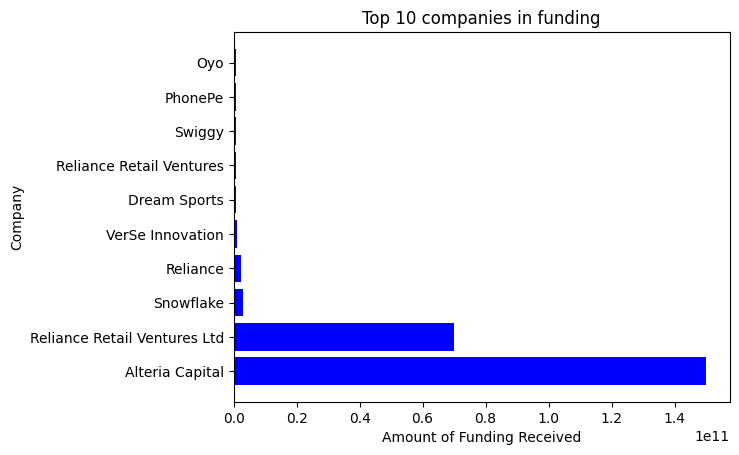

In [292]:
Company = df['Company/Brand'].head(10)
Amount = df['Amount'].head(10)


plt.xlabel('Amount of Funding Received')
plt.ylabel('Company')
plt.title('Top 10 companies in funding')
plt.barh(Company, Amount, color='blue')

2. Which Company received the lowest amount of funds

<BarContainer object of 10 artists>

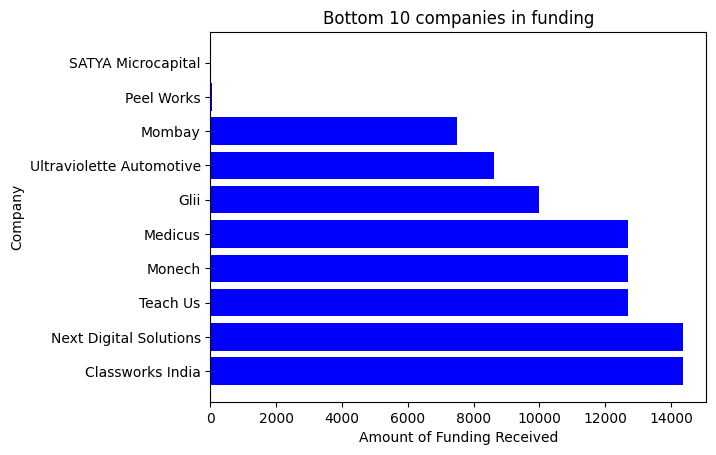

In [409]:
Company = df['Company/Brand'].tail(10)
Amount = df['Amount'].tail(10)


plt.xlabel('Amount of Funding Received')
plt.ylabel('Company')
plt.title('Bottom 10 companies in funding')
plt.barh(Company, Amount, color='blue')

3. Which Industry received the highest amount of funding?

<BarContainer object of 15 artists>

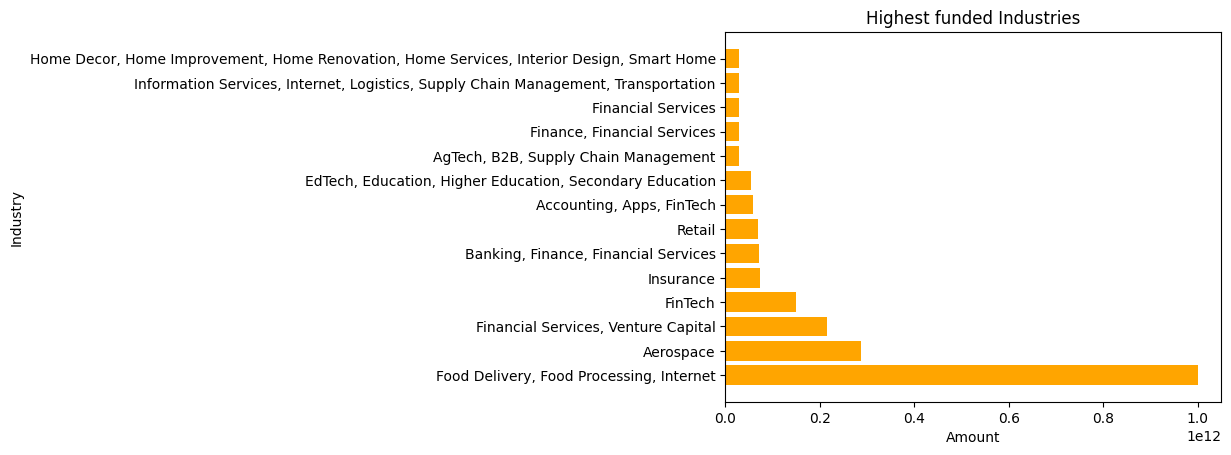

In [410]:
Industry = df['Sector'].head(15)
Amount = df['Amount'].head(15)


plt.xlabel('Amount')
plt.ylabel('Industry')
plt.title('Highest funded Industries')
plt.barh(Industry, Amount, color='Orange')

4. Which industry received the lowest amount of funding?

<BarContainer object of 15 artists>

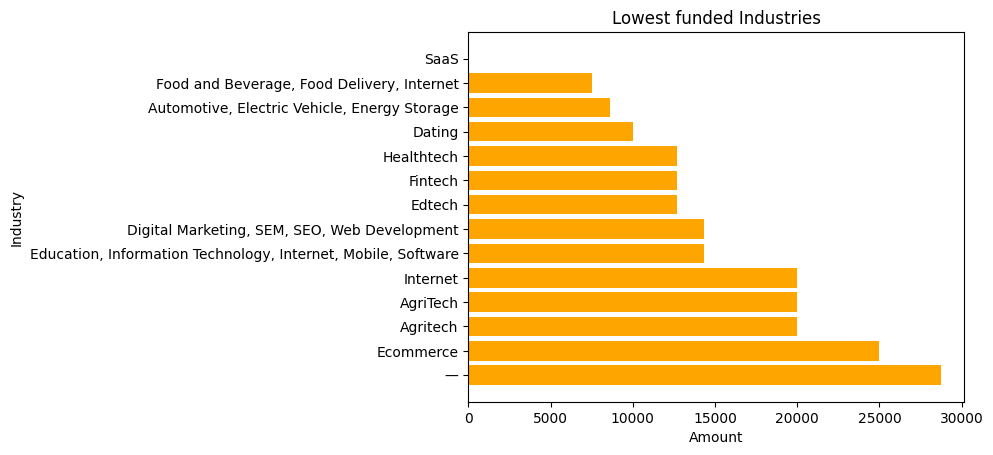

In [411]:
Industry = df['Sector'].tail(15)
Amount = df['Amount'].tail(15)


plt.xlabel('Amount')
plt.ylabel('Industry')
plt.title('Lowest funded Industries')
plt.barh(Industry, Amount, color='Orange')

# Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the correlation and by plotting some charts.

5. Is there a correlation between company age and funds received?

In [412]:
df['Founded'].mode()

0    N/A
Name: Founded, dtype: object

In [413]:
#Replacing all N/A values in Founded with the mode
df['Founded'] = df['Founded'].replace({'N/A':'2019'}, regex=True).astype(int)

In [414]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 101 to 552
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2879 non-null   object 
 1   Sector         2879 non-null   object 
 2   Stage          2878 non-null   object 
 3   HeadQuarter    2879 non-null   object 
 4   What it does   2879 non-null   object 
 5   Amount         2879 non-null   float64
 6   Founded        2879 non-null   int32  
 7   Founders       2879 non-null   object 
 8   Investor       2879 non-null   object 
dtypes: float64(1), int32(1), object(7)
memory usage: 213.7+ KB


In [415]:
# Creating new coulmn Company_age
df['Company_Age'] = 2023 - df['Founded']

In [300]:
#df.sort_values(['Amount'], ascending = False, inplace=True)
df.sort_values(['Company_Age'], ascending = False, inplace=True)
df.head(20)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Company_Age
1001,Duroflex,1963,Bangalore,Furniture,"5 decades of experience, superior quality and ...",P. C. Mathew,Norwest Venture Partners,60000000.00,N/A,60
328,Reliance,1973,Mumbai,Multinational conglomerate company,Reliance owns businesses across India engaged ...,Dhirubhai Ambani,"Facebook, Google, KKR, Silver Lake",2200000000.00,N/A,50
456,Biocon Biologics,1978,Bangalore,BioTechnology,Biocon is a fully integrated pure play biosimi...,Kiran Mazumdar-Shaw,"Goldman Sachs, Tata Capital",70000000.00,N/A,45
152,Biocon,1978,Bangalore,Healthcare,"Biocon is a healthcare and technology, company...",Kiran Mazumdar-Shaw,Goldman Sachs,15000000.00,N/A,45
30,Arya,1982,Noida,AgriTech,"""Simplifying Agribusiness"" Throughout Agri-Sup...","Chattanathan Devarajan, Prasanna Rao, Anand Ch...",Quona Capital,21000000.00,Series B,41
734,Five Star Finance,1984,Chennai,FinTech,Five-Star is a Registered Non Banking Finance ...,V K Ranganathan,"TPG Capital Asia, Epiq Capital",234000000.00,N/A,39
61,WESS,1989,Mumbai,Renewable Energy,Waaree is India's Largest Solar Module Manufac...,Hitesh Doshi,Centrum Financial Services,2000000.00,Seed,34
1000,VLCC Health Care,1989,Gurugram,"Health, Wellness & Fitness",VLCC is today widely recognized for its compre...,Vandana Luthra,N/A,4000000.00,N/A,34
723,Safex Chemicals,1991,New Delhi,AgriTech,Safex Chemicals India Ltd is a leading company...,"SK Jindal, SK Chaudhary",BanyanTree Finance Pvt. Ltd.,50000000.00,N/A,32
15,Tessolve,1993,Bangalore,Electronics,Tessolve Semiconductor offers engineering in s...,"P Raja Manickam, Srinivas Chinamilli, Veerappan V",Novo Tellus Capital,40000000.00,N/A,30


In [416]:
df['Company_Age'].head(50)

101     4
421     4
420     4
73      5
90      4
156     4
280    17
422     4
130     4
127     4
116     4
412     4
448     4
92      4
100     4
94      4
389     4
132     4
356     4
373     4
516     4
513     4
97      4
91      4
360     4
148     4
372     4
399     4
354     4
369     4
351     4
397     4
104     4
115     4
317    11
106     4
117     4
328    50
146     4
514     4
457     4
392     4
122     4
370     4
833     6
163    13
166     4
170    11
171     6
173     7
Name: Company_Age, dtype: int32

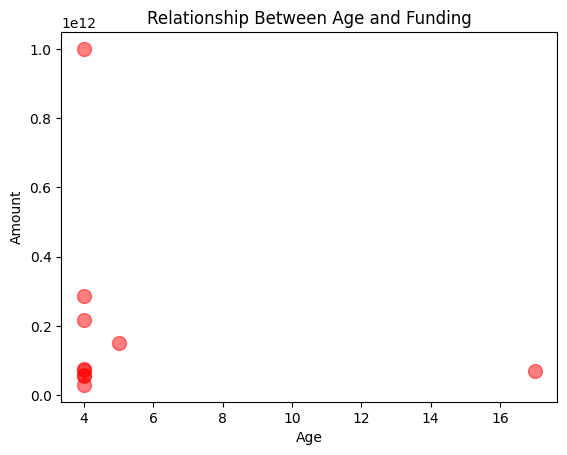

In [417]:
Age = df['Company_Age'].head(10)
Amount = df['Amount'].head(10)





plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Relationship Between Age and Funding')
plt.scatter(Age, Amount, color='red', alpha=0.5, s=100)
plt.show()

6. Which location recorded the highest amount of funding received?

In [418]:
df.sort_values(['Amount'], ascending = False, inplace=True)
df.head(20)

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount,Founded,Founders,Investor,Company_Age
101,Swiggy,"Food Delivery, Food Processing, Internet",Series H,Bangaloreo Karnatakao India,Swiggy is a food ordering and delivery company...,1000000000000.00,2019,N/A,N/A,4
421,Vistara,Aerospace,Private Equity,Haryanao Haryanao India,Vistara is a joint venture of Tata Sons Limite...,287220085839.00,2019,N/A,N/A,4
420,Indiabulls Ventures,"Financial Services, Venture Capital",Post-IPO Equity,Mumbaio Maharashtrao India,Indiabulls Ventures Limited is one of India’s ...,215978015748.00,2019,N/A,N/A,4
73,Alteria Capital,FinTech,Debt,Mumbai,Alteria Capital is a Venture debt firm .,150000000000.00,2018,Vinod Murali,N/A,5
90,SBI Life,Insurance,Private Equity,Mumbaio Maharashtrao India,SBI Life is one of the life insurance company ...,74200000000.00,2019,N/A,N/A,4
156,Fusion Microfinance,"Banking, Finance, Financial Services",Series E,New Delhio Delhio India,Fusion Microfinance Pvt. Ltd. is an NBFC regis...,72092241545.00,2019,N/A,N/A,4
280,Reliance Retail Ventures Ltd,Retail,N/A,Mumbai,Reliance Retail offers online shopping and a c...,70000000000.00,2006,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",17
422,ClearTax,"Accounting, Apps, FinTech",Series B,New Delhio Delhio India,ClearTax India helps individuals prepare and e...,57444017167.00,2019,N/A,N/A,4
130,BYJU’S,"EdTech, Education, Higher Education, Secondary...",Private Equity,Bangaloreo Karnatakao India,BYJU’s is an edtech company that is reinventin...,54000000000.00,2019,N/A,N/A,4
127,Ninjacart,"AgTech, B2B, Supply Chain Management",Series B,Bengaluruo Karnatakao India,Ninjacart is a B2B agri-marketing platform tha...,29440058798.00,2019,N/A,N/A,4


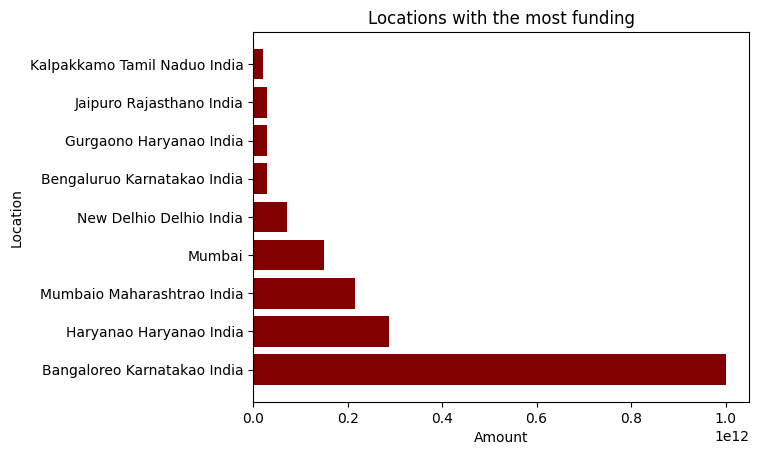

In [419]:
Location = df['HeadQuarter'].head(20)
Amount = df['Amount'].head(20)





plt.xlabel('Amount')
plt.ylabel('Location')
plt.title('Locations with the most funding')
plt.barh(Location, Amount, color='maroon')
plt.show()

7. What is the average age of the start-ups?

In [420]:
df['Company_Age'].mean()

6.140326502257729

8. What is the average amount of funding received?

In [421]:
df['Amount'].mean()

1054996974.8369161

9. How many companies were funded in each year?

In [423]:
df['Amount'].notnull().sum()

2879

# Hypothesis

Null Hypothesis - The sector of a start-up affect the amount of funding received.

Alternate Hypothesis - The sector of a start up does not affect the amount of funding received

We failed to reject the null hypothesis since from the data it showed after analysis that the sector of a start-up does affect the amount of funding recieved.